In [1]:
#import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
#import data
df_prod = pd.read_excel('data/Products.xlsx')
df_prod.head()

,Cust_ID,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts
0,4,0,76,2024-02-19,248,37,6
1,5,0,75,2024-02-17,248,37,6
2,6,6,69,2024-02-15,215,34,5
3,9,36,71,2024-02-13,248,35,8
4,10,8,97,2024-02-15,204,34,5


In [6]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Cust_ID            4000 non-null   int64         
 1   Fitness&Gym        4000 non-null   int64         
 2   Hiking&Running     4000 non-null   int64         
 3   Last_Purchase      4000 non-null   datetime64[ns]
 4   TeamGames          4000 non-null   int64         
 5   OutdoorActivities  4000 non-null   int64         
 6   TotalProducts      4000 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 218.9 KB


No null data. Data types seem appropriate.  
Money spent could be float, but we can make that up now.

In [8]:
#Cust_IDs are unique?
len(df_prod['Cust_ID'].unique())

4000

In [9]:
#Cust_ID as index
df_prod.set_index('Cust_ID', inplace=True)
df_prod.head(5)

,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts
Cust_ID,,,,,,
4,0,76,2024-02-19,248,37,6
5,0,75,2024-02-17,248,37,6
6,6,69,2024-02-15,215,34,5
9,36,71,2024-02-13,248,35,8
10,8,97,2024-02-15,204,34,5


In [10]:
#basic statistics
df_prod.describe()

,Fitness&Gym,Hiking&Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts
count,4000.000000,4000.000000,4000,4000.000000,4000.000000,4000.000000
mean,32.020250,55.844750,2024-01-30 18:50:02.399999744,176.085000,33.602750,5.329500
min,0.000000,9.000000,2023-10-15 00:00:00,0.000000,28.000000,2.000000
25%,25.000000,38.000000,2024-01-20 00:00:00,121.000000,32.000000,4.000000
50%,31.000000,47.000000,2024-02-01 00:00:00,180.000000,33.000000,5.000000
75%,40.000000,66.000000,2024-02-13 00:00:00,230.000000,35.000000,6.000000
max,123.000000,464.000000,2024-02-29 00:00:00,1203.000000,42.000000,20.000000
std,14.469284,33.119109,NaN,69.964738,1.711483,1.515257


All features (maybe except 'Hiking&Running') probably have normal ditribution. Let's verify graphically.  

'TeamGames' is the category with the highest sales values - one player or institution buys for everyone?  
- does it correlate with more items bought?

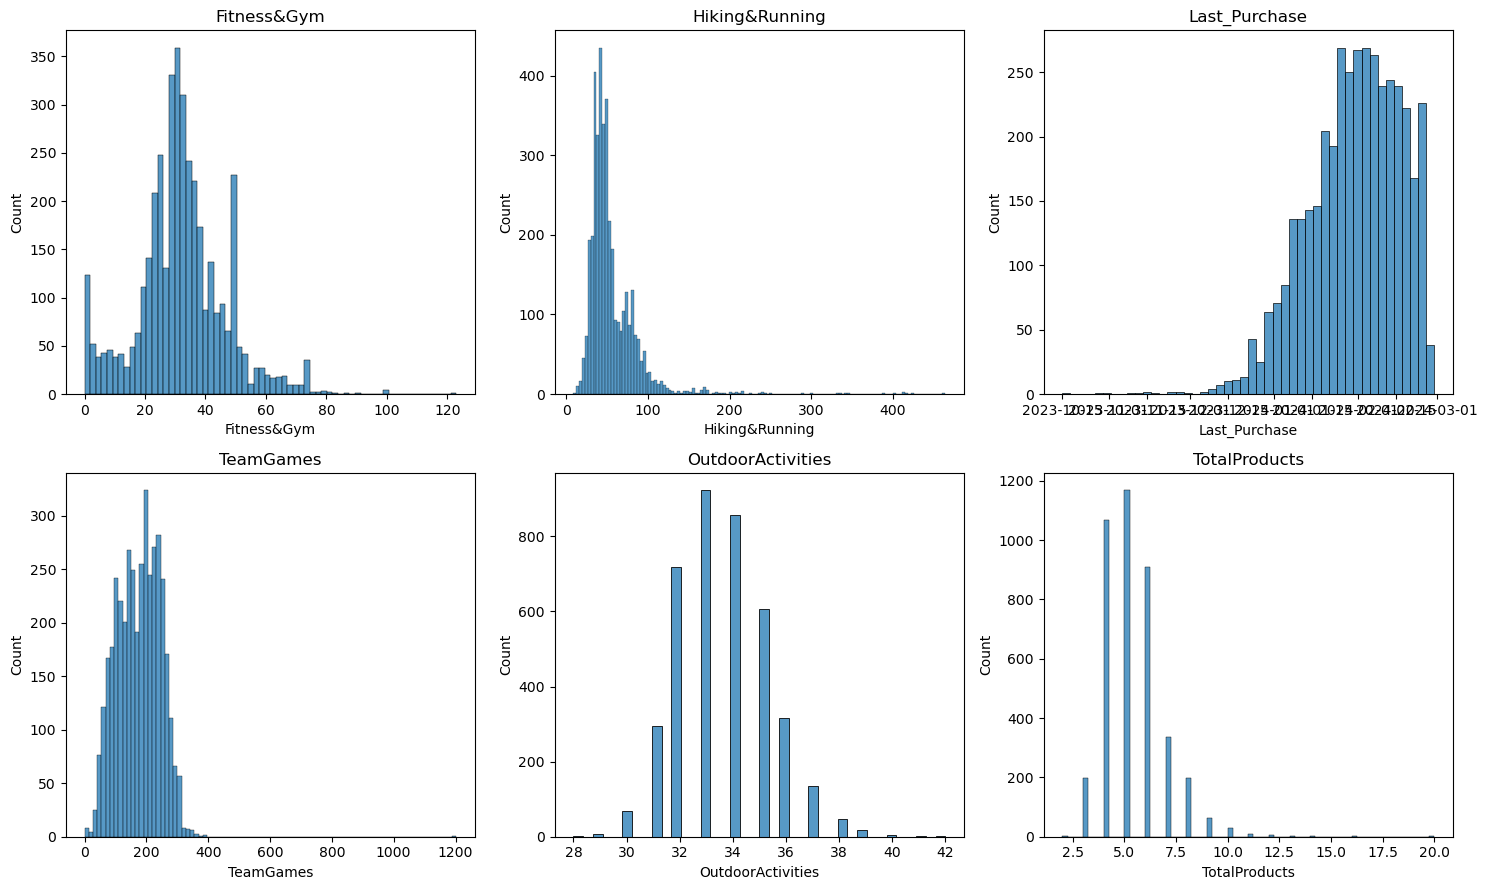

In [11]:
#look ate distribution of values
fig, axes = plt.subplots(2, 3, figsize=(15, 9))  # Create a 2x3 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to iterate over it

for i, column in enumerate(df_prod.columns):
        sns.histplot(df_prod[column], ax=axes[i])
        axes[i].set_title(f'{column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [15]:
df_prod_num = df_prod.drop('Last_Purchase', axis=1)
df_prod_num.head()

,Fitness&Gym,Hiking&Running,TeamGames,OutdoorActivities,TotalProducts
Cust_ID,,,,,
4,0,76,248,37,6
5,0,75,248,37,6
6,6,69,215,34,5
9,36,71,248,35,8
10,8,97,204,34,5


In [16]:
df_prod_num.duplicated()

Cust_ID
4       False
5       False
6       False
9       False
10      False
        ...  
6489    False
6491    False
6492    False
6495    False
6496    False
Length: 4000, dtype: bool

In [18]:
df_prod_num.head(10)

,Fitness&Gym,Hiking&Running,TeamGames,OutdoorActivities,TotalProducts
Cust_ID,,,,,
4,0,76,248,37,6
5,0,75,248,37,6
6,6,69,215,34,5
9,36,71,248,35,8
10,8,97,204,34,5
11,36,71,248,35,8
12,0,89,167,37,5
15,19,170,266,33,9
18,8,86,239,35,5
